<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание данных</a></span></li><li><span><a href="#Загрузка-данных-и-предобработка" data-toc-modified-id="Загрузка-данных-и-предобработка-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Загрузка данных и предобработка</a></span><ul class="toc-item"><li><span><a href="#Выгрузка-данных-и-изучения-общей-информации" data-toc-modified-id="Выгрузка-данных-и-изучения-общей-информации-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Выгрузка данных и изучения общей информации</a></span></li><li><span><a href="#Предобработка" data-toc-modified-id="Предобработка-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Предобработка</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Физические-лица" data-toc-modified-id="Физические-лица-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Физические лица</a></span></li><li><span><a href="#Физические-лица-ВИП" data-toc-modified-id="Физические-лица-ВИП-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Физические лица ВИП</a></span></li><li><span><a href="#Юридические-лица" data-toc-modified-id="Юридические-лица-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Юридические лица</a></span></li><li><span><a href="#Юридические-лица-ВИП" data-toc-modified-id="Юридические-лица-ВИП-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Юридические лица ВИП</a></span></li></ul></li><li><span><a href="#Заключение" data-toc-modified-id="Заключение-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Заключение</a></span></li></ul></div>

# Кейс ВТБ

## Описание данных

В нашем распоряжении две таблицы:

Данные:

1. `year` - ГОД ОПЕРАЦИИ
2. `month` - МЕСЯЦ ОПЕРАЦИИ
3. `ter_group2` - ТЕРР.ГРУППА (2)
4. `waiting_interval_min` - ИНТЕРВАЛ ОЖИДАНИЯ, МИН
5. `segment` - СЕГМЕНТ
6. `client_type` - ТИП ЛИЦА, физическое или юридическое лицо
7. `vip_client` - ВИП КЛИЕНТ
8. `transfer_window` - ПЕРЕВОД В ДРУГОЕ ОКНО
9. `transfer_window_return` - ПЕРЕВОД В ДРУГОЕ ОКНО С ВОЗВРАТОМ
10. `client_gone` - КЛИЕНТ УШЕЛ
11. `operation_name` - НАЗВАНИЕ ОПЕРАЦИИ
12. `sum_time_waiting` - СУММАРНОЕ ВРЕМЯ ОЖИДАНИЯ (ДНИ ЧАСЫ: МИНУТЫ:СЕКУНДЫ)
13. `sum_time_service` - СУММАРНОЕ ВРЕМЯ ОБСЛУЖИВАНИЯ (ДНИ ЧАСЫ: МИНУТЫ:СЕКУНДЫ)
14. `talon_count` - ОБЩЕЕ КОЛИЧЕСТВО ТАЛОНОВ (ЧЕЛОВЕК В ОЧЕРЕДИ)
15. `operation_count` - ОБЩЕЕ КОЛИЧЕСТВО ОПЕРАЦИЙ

Справочник:
1. `ter_group1` - ТЕРР.ГРУППА (1) 
2. `ter_group2` - ТЕРР.ГРУППА (2)
3. `ter_group3` - ТЕРР.ГРУППА (3)
4. `ter_group4` - ТЕРР.ГРУППА (4)

Задания:
1. Необходимо пранализировать данные по ожиданию клиентов в очереди и продолжительности операций (вкладки ДАННЫЕ и СПРАВОЧНИК).
2. Подготовить отчет с визуализацией данных, позволяющий наглядно увидеть основные тенденции и проблемы процессов.

Шаги для выполнения заданий:

1. Загрузка и изучение данных
2. Предобработка
3. Визуализация и анализ полученных диаграмм
4. Заключение

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Загрузка данных и предобработка

### Выгрузка данных и изучения общей информации

In [2]:
data = pd.read_excel('datasets/Кейс.xlsx', sheet_name='ДАННЫЕ')
ter_group = pd.read_excel('datasets/Кейс.xlsx', sheet_name='СПРАВОЧНИК')

In [3]:
pd.set_option('display.max_columns', None) # Добавим max_columns для анализа всей таблицы
data.head(10)

,ГОД ОПЕРАЦИИ,МЕСЯЦ ОПЕРАЦИИ,ТЕРР.ГРУППА (2),"ИНТЕРВАЛ ОЖИДАНИЯ, МИН",СЕГМЕНТ,ТИП ЛИЦА,ВИП КЛИЕНТ,ПЕРЕВОД В ДРУГОЕ ОКНО,ПЕРЕВОД В ДРУГОЕ ОКНО С ВОЗВРАТОМ,КЛИЕНТ УШЕЛ,НАЗВАНИЕ ОПЕРАЦИИ,СУММАРНОЕ ВРЕМЯ ОЖИДАНИЯ (ДНИ ЧАСЫ: МИНУТЫ:СЕКУНДЫ),СУММАРНОЕ ВРЕМЯ ОБСЛУЖИВАНИЯ (ДНИ ЧАСЫ: МИНУТЫ:СЕКУНДЫ),ОБЩЕЕ КОЛИЧЕСТВО ТАЛОНОВ (ЧЕЛОВЕК В ОЧЕРЕДИ),ОБЩЕЕ КОЛИЧЕСТВО ОПЕРАЦИЙ
0,2009,1,БГ Академическая,0-5,Массовый сегмент,ФЛ,1,1,0,0,(vip) Окно,0 00:50:48,0 20:26:18,67,134
1,2009,1,БГ Академическая,0-5,Массовый сегмент,ФЛ,1,0,1,0,(vip) Окно,0 00:02:28,0 00:30:10,2,6
2,2009,1,БГ Академическая,0-5,Массовый сегмент,ФЛ,1,0,0,1,(vip) Окно,0 03:56:50,0 03:20:10,264,264
3,2009,1,БГ Академическая,0-5,Массовый сегмент,ФЛ,1,0,0,0,(vip) Окно,0 10:47:10,19 23:46:30,1618,1618
4,2009,1,БГ Академическая,0-5,Массовый сегмент,ФЛ,0,1,0,1,"Обмен валюты, Монеты",0 00:00:10,0 00:01:30,1,2
5,2009,1,БГ Академическая,0-5,Массовый сегмент,ФЛ,0,1,0,0,Вклады и инвестиционные продукты,0 00:06:24,0 01:00:32,5,10
6,2009,1,БГ Академическая,0-5,Массовый сегмент,ФЛ,0,1,0,0,"Вклады (открытие, получение процентов,",0 03:45:22,1 15:21:18,145,290
7,2009,1,БГ Академическая,0-5,Массовый сегмент,ФЛ,0,1,0,0,Внесение наличных,0 00:00:18,0 00:07:12,1,2
8,2009,1,БГ Академическая,0-5,Массовый сегмент,ФЛ,0,1,0,0,ВТБ Мобайл,0 00:00:24,0 00:58:16,2,4
9,2009,1,БГ Академическая,0-5,Массовый сегмент,ФЛ,0,1,0,0,Выписка/справка по карте,0 00:05:36,0 00:39:40,4,8


In [4]:
ter_group.head(10)

,ТЕРР.ГРУППА (1),ТЕРР.ГРУППА (2),ТЕРР.ГРУППА (3),ТЕРР.ГРУППА (4)
0,Регионы,РОО Ростовский,Ростовская область,ОО Военвед
1,Регионы,РОО Ярославский,Ярославская область,ОО Локомотивный
2,Регионы,РОО Краснодарский,Краснодарский Край,ДО На Майорском
3,Регионы,РОО Тюменский,Тюменская область,ВКУ в г. Тюмень
4,СПБиЛО,БГ Меридиан,Санкт-Петербург,"ДО № 59 Ленинский, 84"
5,Москва,БГ Даниловская,Москва,ДО На Автозаводской
6,Регионы,РОО Нижегородский,Нижегородская область,ОО Саровский
7,Москва,БГ Хамовническая,Москва,ДО Воронцовский
8,Регионы,РОО Курский,Курская область,ОО Льговский
9,Регионы,РОО Белгородский,Белгородская область,ОО Губкинский


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396619 entries, 0 to 396618
Data columns (total 15 columns):
 #   Column                                                   Non-Null Count   Dtype 
---  ------                                                   --------------   ----- 
 0   ГОД ОПЕРАЦИИ                                             396619 non-null  int64 
 1   МЕСЯЦ ОПЕРАЦИИ                                           396619 non-null  int64 
 2   ТЕРР.ГРУППА (2)                                          396619 non-null  object
 3   ИНТЕРВАЛ ОЖИДАНИЯ, МИН                                   396619 non-null  object
 4   СЕГМЕНТ                                                  396619 non-null  object
 5   ТИП ЛИЦА                                                 396619 non-null  object
 6   ВИП КЛИЕНТ                                               396619 non-null  int64 
 7   ПЕРЕВОД В ДРУГОЕ ОКНО                                    396619 non-null  int64 
 8   ПЕРЕВОД В ДРУГОЕ ОКНО С 

### Предобработка

Переименуем столбцы в обеих таблицах, для удобства

In [6]:
column = ['year', 'month', 'ter_group2', 
          'waiting_interval_min', 'segment', 'client_type', 
          'vip_client', 'transfer_window', 'transfer_window_return',
         'client_gone', 'operation_name', 'sum_time_waiting', 
          'sum_time_service', 'talon_count', 'operation_count']
data.columns = column
column = ['ter_group1', 'ter_group2', 'ter_group3', 'ter_group4']
ter_group.columns = column

Переведом строковые данные в нижний регистр для обработки неявных дубликатов

In [7]:
ls = ['ter_group2', 'segment', 'client_type', 'operation_name']

for s in ls:
    data[s] = data[s].str.lower()

In [8]:
ls = ['ter_group1', 'ter_group2', 'ter_group3', 'ter_group4']

for s in ls:
    ter_group[s] = ter_group[s].str.lower()

Посмотрим количество пропусков

In [9]:
data.isna().sum()

year                        0
month                       0
ter_group2                  0
waiting_interval_min        0
segment                     0
client_type                 0
vip_client                  0
transfer_window             0
transfer_window_return      0
client_gone                 0
operation_name            152
sum_time_waiting            0
sum_time_service            0
talon_count                 0
operation_count             0
dtype: int64

In [10]:
ter_group.isna().sum()

ter_group1    0
ter_group2    0
ter_group3    0
ter_group4    0
dtype: int64

Количество дубликатов

In [11]:
data.duplicated().sum()

0

In [12]:
ter_group.duplicated().sum()

184

Удалим дубликаты

In [13]:
ter_group = ter_group.drop_duplicates().reset_index(drop=True)

In [14]:
data['year'].unique()

array([2009], dtype=int64)

Поскольку данные только за 2009 год, удалим этот столбец

In [15]:
del data['year']

Напишем функцию, которая разделит дни и часы с минутами и секундами

In [16]:
def split_day_time(row):
    day, time = row.split(' ')
    return pd.Series([day, time])

In [17]:
data[['day_waiting','time_waiting']] = data['sum_time_waiting'].apply(split_day_time)
data[['day_service','time_service']] = data['sum_time_service'].apply(split_day_time)

Удалим исходные столбцы, для освобождения оперативной памяти

In [18]:
del data['sum_time_waiting'], data['sum_time_service']

Преобразуем в формат datetime, для дальнейшей работы

In [19]:
data['time_waiting'] = pd.to_datetime(data['time_waiting'], format='%H:%M:%S')
data['time_service'] = pd.to_datetime(data['time_service'], format='%H:%M:%S')

А дни преобразуем в числовой тип

In [20]:
data['day_waiting'] = data['day_waiting'].astype('int')
data['day_service'] = data['day_service'].astype('int')

Посчитаем количество минут ожидания и обслуживания

In [21]:
data['sum_waiting_min'] = (data['day_waiting'] * 24 * 60 + 
                       data['time_waiting'].dt.hour * 60  + 
                       data['time_waiting'].dt.minute + 
                       data['time_waiting'].dt.second / 60)

In [22]:
data['sum_service_min'] = (data['day_service'] * 24 * 60 + 
                       data['time_service'].dt.hour * 60 + 
                       data['time_service'].dt.minute + 
                       data['time_service'].dt.second / 60)

In [23]:
data['avg_waiting_min'] = data['sum_waiting_min'] / data['operation_count']
data['avg_service_min'] = data['sum_service_min'] / data['operation_count']

Также удалим уже ненужные столбцы

In [24]:
del data['day_waiting'], data['time_waiting'], data['day_service'], data['time_service']

**Промежуточные выводы**

- Были изучены исходные данные
- Все строковые данные были переведены в нижний регистр
- Обработаны дубликаты
- Поскольку данные только за 2009 год, был удален столбец с годом
- Были обработаны столбцы с временем ожидания и обслуживания
- Добавлен столбец с временем обслуживания и ожидания в минутах, для дальнейшей визуализации
- Удалены ненужные столбцы

## Анализ данных

Вначале разделим данные по физ. и юр. лицам

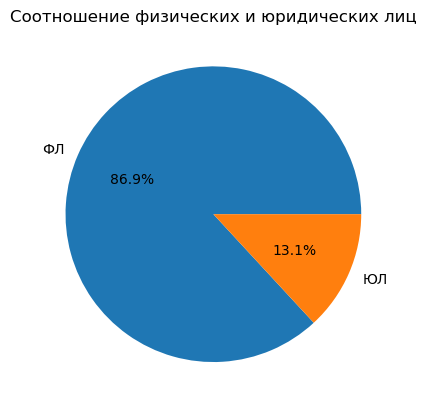

In [25]:
data_client = (data.pivot_table(index='client_type', values='ter_group2', aggfunc='count')
 .reset_index()
 .sort_values(by='ter_group2', ascending=False))
plt.pie(data_client['ter_group2'], labels=data_client['client_type'].str.upper(), autopct='%.1f%%')
plt.title('Соотношение физических и юридических лиц');

Напишем функцию для построения гистограммы количества операций в 20 территориальных группах

In [26]:
def barh_ter(data, title):
    data_pivot = (data
                  .pivot_table(index='ter_group2', values='operation_count', aggfunc='sum')
                  .sort_values(by='operation_count', ascending=False)
                  .head(20))
    
    plt.figure(figsize=(16,9))
    plt.barh(data_pivot.index, data_pivot['operation_count'])
    plt.xlabel('Количество операций', fontsize=15)
    plt.ylabel('Территориальная группа 2', fontsize=15)
    plt.title('Общее количество операций в территориальной группе 2 для ' +title, fontsize=15)

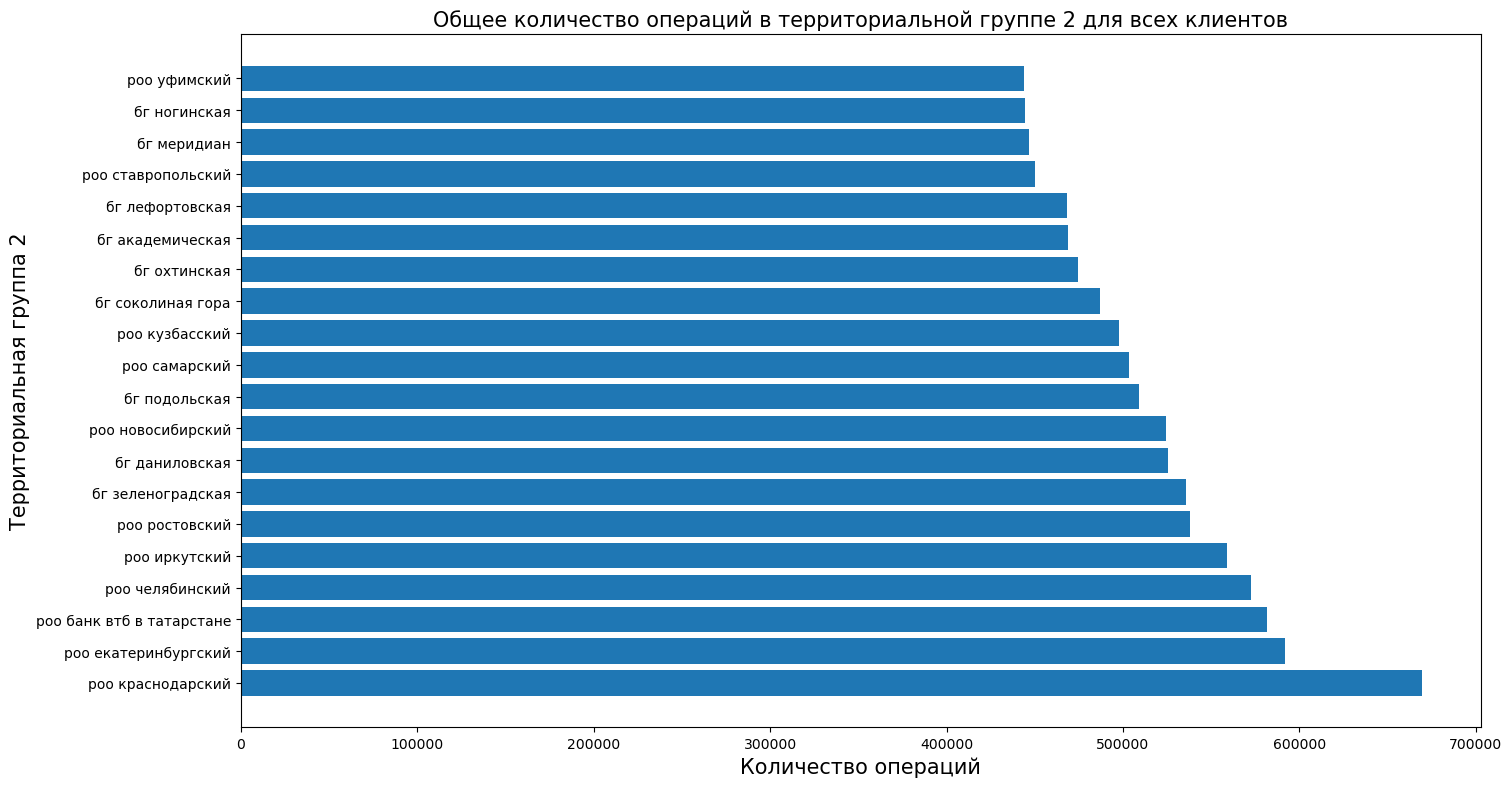

In [27]:
barh_ter(data, 'всех клиентов')

In [28]:
data_ind = data.loc[data['client_type'] == 'фл']
data_ent = data.loc[data['client_type'] == 'юл']

In [29]:
data['vip_client'].sum() / data['vip_client'].count() * 100

3.699772325581982

Процент ВИП-клиентов очень маленький, посмотрим на ср. время обслуживания и ожидания

In [30]:
data.pivot_table(index='vip_client', values=['avg_waiting_min', 'avg_service_min'], aggfunc='mean')

,avg_service_min,avg_waiting_min
vip_client,,
0,9.311652,17.940334
1,12.598344,20.955215


У ВИП-клиентов время ожидания и обслуживание выше, поэтому сделаем срез по обычным клиентам

In [31]:
data_ind = data_ind.loc[data['vip_client'] == 0]
data_ent = data_ent.loc[data['vip_client'] == 0]

### Физические лица

Напишем функцию, которая построит круговую диаграмму с соотношениями количества операций для типа операций

In [32]:
def operation_name_pie(data, title):
    data_pivot = (data
                  .pivot_table(index='operation_name', values='ter_group2', aggfunc='count')
                  .reset_index()
                  .sort_values(by='ter_group2', ascending=False))
    top5 = data_pivot.head()
    df2 = pd.DataFrame({'operation_name': ['Другие'], 'ter_group2': [data_pivot.loc[5:, 'ter_group2'].sum()]})

    top5 = pd.concat([top5, df2], ignore_index=True)
    plt.pie(top5['ter_group2'], labels=top5['operation_name'], autopct='%.1f%%')
    plt.title('Соотношение количества операций '+title, fontsize=10);

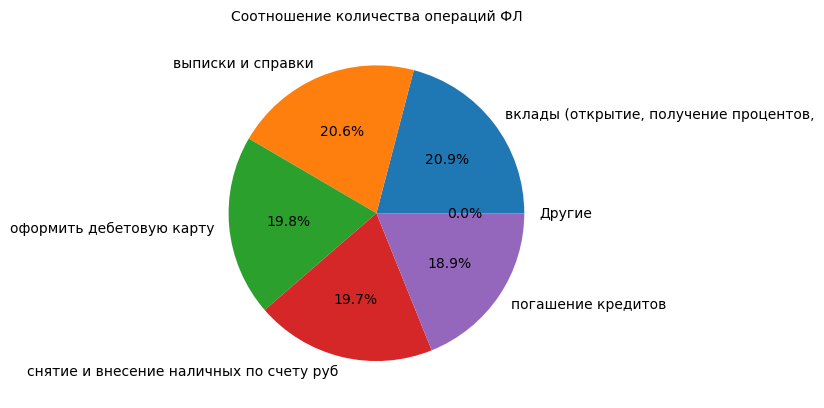

In [33]:
operation_name_pie(data_ind, 'ФЛ')

Основные операции для ФЛ:
1. Вклады
2. Выписки и справки
3. Оформление дебетовой карты
4. Снятие и внесение наличных
5. Погашение кредитов

Построим распределния времени ожидания и обслуживания

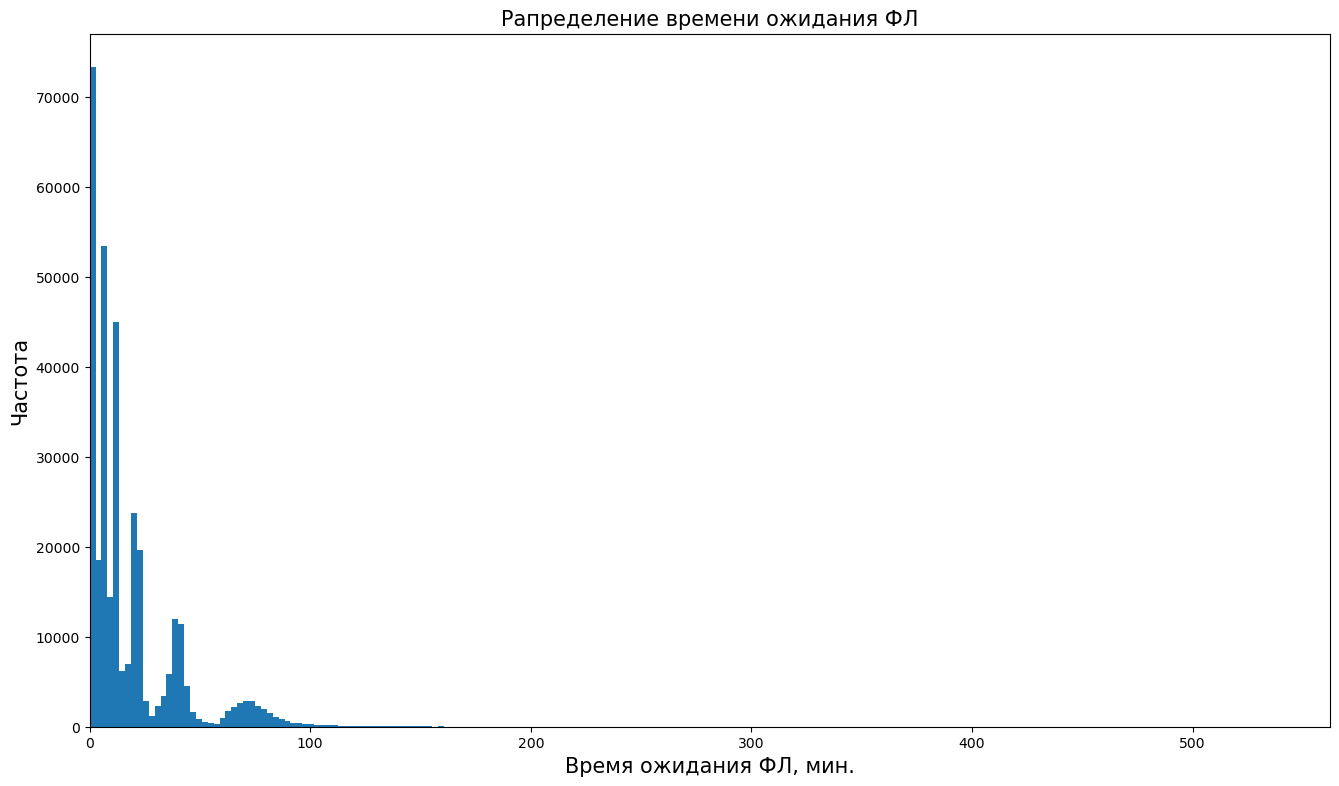

In [34]:
plt.figure(figsize=(16, 9))
plt.hist(data_ind['avg_waiting_min'], bins=200)
plt.xlabel('Время ожидания ФЛ, мин.', fontsize=15)
plt.xlim(0)
plt.ylabel('Частота', fontsize=15)
plt.title('Рапределение времени ожидания ФЛ', fontsize=15);

Присутствуют несколько пиков, которые скорее всего соотносятся с различными типами операций

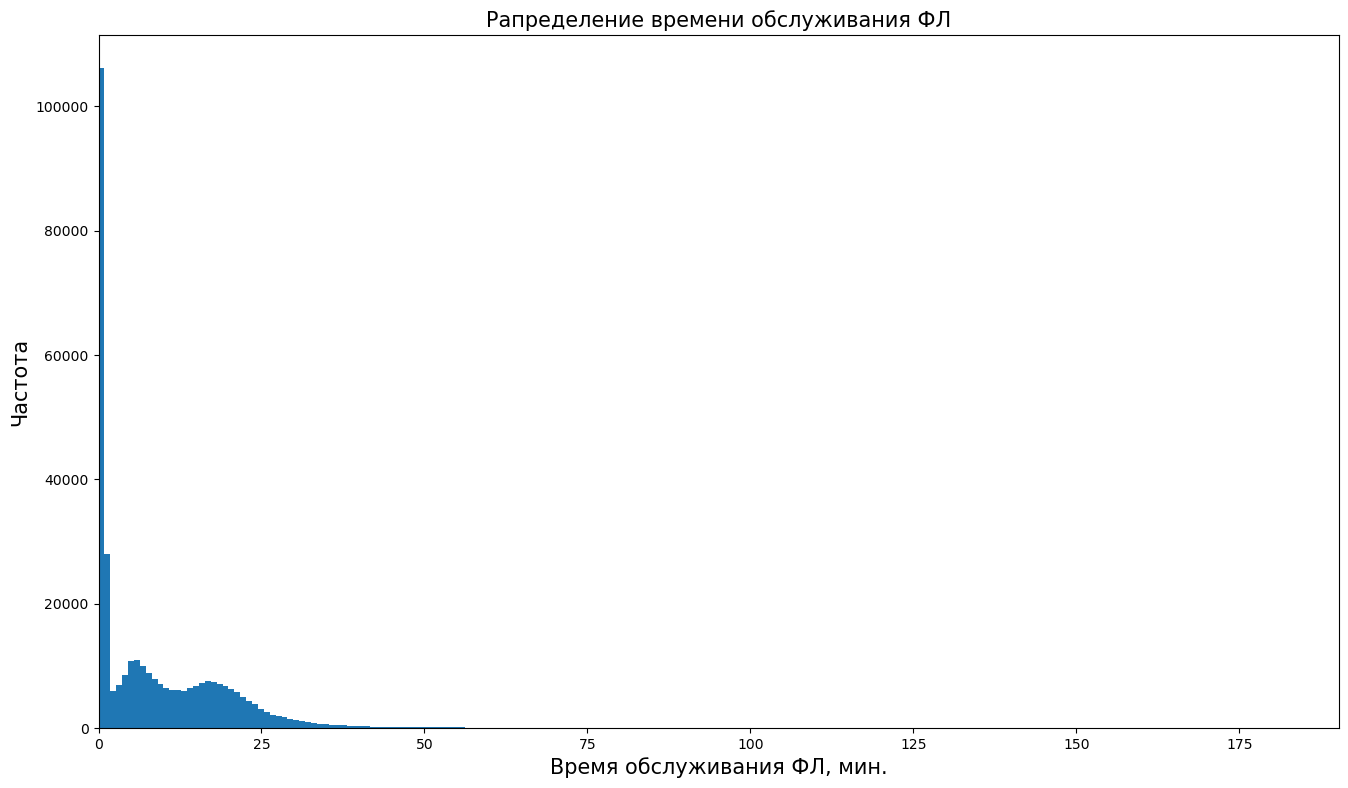

In [35]:
plt.figure(figsize=(16, 9))
plt.hist(data_ind['avg_service_min'], bins=200)
plt.xlabel('Время обслуживания ФЛ, мин.', fontsize=15)
plt.xlim(0)
plt.ylabel('Частота', fontsize=15)
plt.title('Рапределение времени обслуживания ФЛ', fontsize=15);

Со временем обслуживания сложнее распределение более гладкое

Будем анализировать данные у которых время ожидания больше 2 минут, чтоб они не исказили выводы

In [36]:
data_ind = data_ind.loc[data_ind['avg_waiting_min'] > 2]

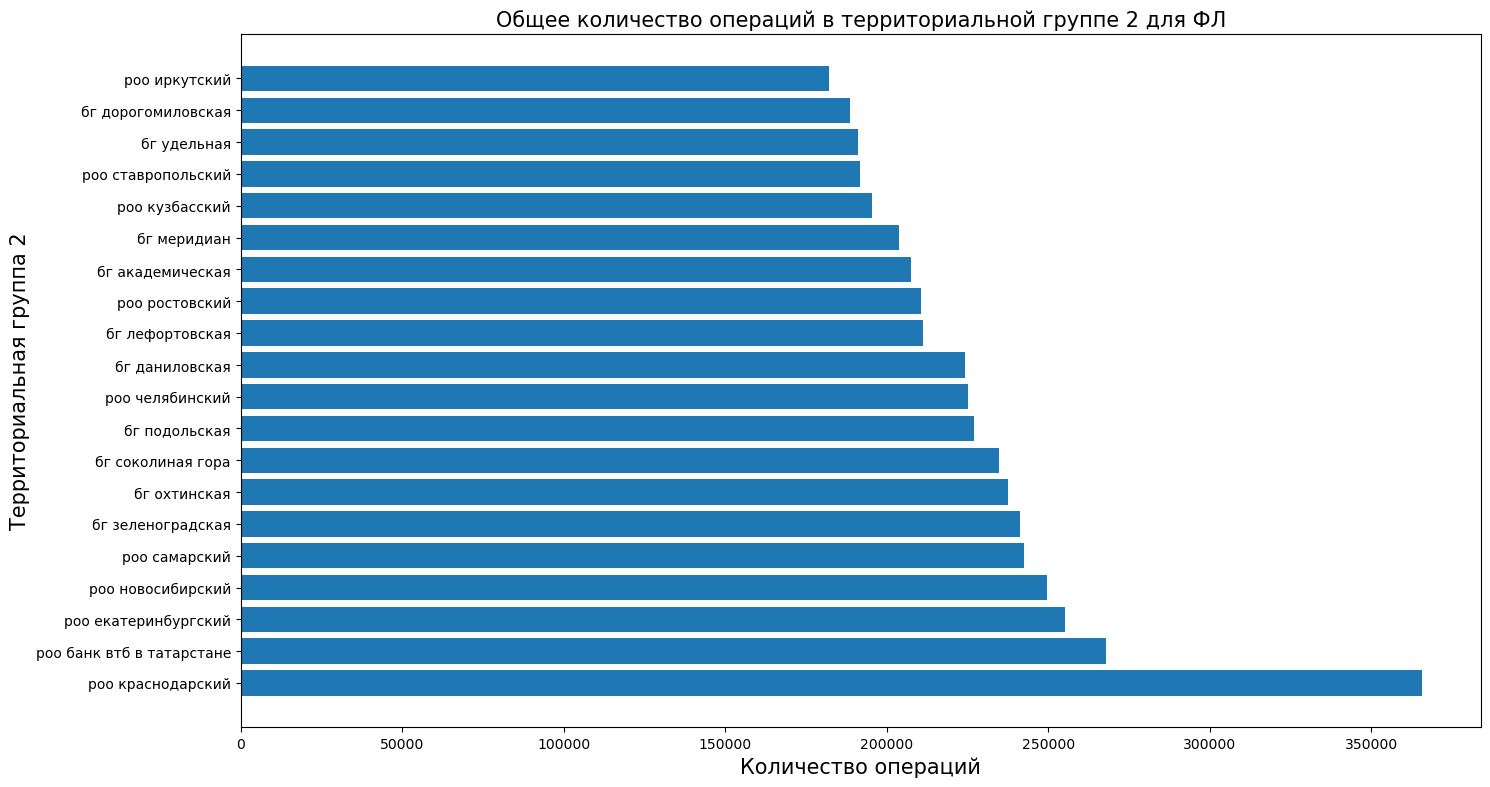

In [37]:
barh_ter(data_ind, 'ФЛ')

Больше всего операций проводятся:
1. РОО Краснодарский
2. РОО банк ВТБ в Татарстане
3. РОО Екатеринбургский
4. РОО Новосибирский
5. РОО Самарский

Скорее всего из-за малого количества отделений банка в данных городах/регионах

Напишем функцию, которая создает сводную таблицу по основным операциям и по наибольшему количеству операций в территориальной группе

In [38]:
def pivot(df):
    df_operation_name = list(df
                         .pivot_table(index='operation_name', values='ter_group2', aggfunc='count')
                         .sort_values(by='ter_group2', ascending=False)
                         .head().index)
    df_ter_group_name = list(df
                             .pivot_table(index='ter_group2', values='operation_count', aggfunc='sum')
                             .sort_values(by='operation_count', ascending=False)
                             .head()
                             .index)
    df = df[df['operation_name'].isin(df_operation_name)]
    df = df[df['ter_group2'].isin(df_ter_group_name)]
    new_df = (df
            .pivot_table(index=['ter_group2', 'operation_name'], 
                         values=['avg_waiting_min', 'avg_service_min', 'operation_count'], 
                         aggfunc={'avg_waiting_min':'median','avg_service_min':'median', 'operation_count' : 'sum'})
             )
    return new_df.reset_index()

In [39]:
data_ind_pivot = pivot(data_ind)

Построим гистограмму времени обс/ожид по различным терр. группам и видам операций

In [40]:
def barh_top5_terr(df, title):
    ls = list(df['ter_group2'].unique())
    fig = plt.figure(figsize=(9, 16))
    #fig.subplots_adjust(left=0)

    ax1 = fig.add_subplot(511)
    a = df.loc[df['ter_group2'] == ls[0]]
    ax1.barh(a['operation_name'], a['avg_waiting_min'], label='Ожидание')
    ax1.barh(a['operation_name'], a['avg_service_min'], label='Обслуживание')
    ax1.set_title(ls[0])
    ax1.legend()

    ax2 = fig.add_subplot(512, sharex =ax1)
    a = df.loc[df['ter_group2'] == ls[1]]
    ax2.barh(a['operation_name'], a['avg_waiting_min'], label='Ожидание')
    ax2.barh(a['operation_name'], a['avg_service_min'], label='Обслуживание')
    ax2.set_title(ls[1])

    ax3 = fig.add_subplot(513, sharex =ax1)
    a = df.loc[df['ter_group2'] == ls[2]]
    ax3.barh(a['operation_name'], a['avg_waiting_min'], label='Ожидание')
    ax3.barh(a['operation_name'], a['avg_service_min'], label='Обслуживание')
    ax3.set_title(ls[2])

    ax4 = fig.add_subplot(514, sharex =ax1)
    a = df.loc[df['ter_group2'] == ls[3]]
    ax4.barh(a['operation_name'], a['avg_waiting_min'], label='Ожидание')
    ax4.barh(a['operation_name'], a['avg_service_min'], label='Обслуживание')
    ax4.set_title(ls[3])

    ax5 = fig.add_subplot(515, sharex =ax1)
    a = df.loc[df['ter_group2'] == ls[4]]
    ax5.barh(a['operation_name'], a['avg_waiting_min'], label='Ожидание')
    ax5.barh(a['operation_name'], a['avg_service_min'], label='Обслуживание')
    ax5.set_xlabel('Время, мин.')
    ax5.set_title(ls[4])

    plt.setp(ax1.get_xticklabels(), visible=False)
    plt.setp(ax2.get_xticklabels(), visible=False)
    plt.setp(ax3.get_xticklabels(), visible=False)
    plt.setp(ax4.get_xticklabels(), visible=False)
    fig.suptitle('Медианное время ожидания/обслуживания для ' + title);

    #handles, labels = zip(*(ax.get_legend_handles_labels() for ax in [ax1, ax2, ax3, ax4, ax5]))
    #fig.legend(handles, labels);

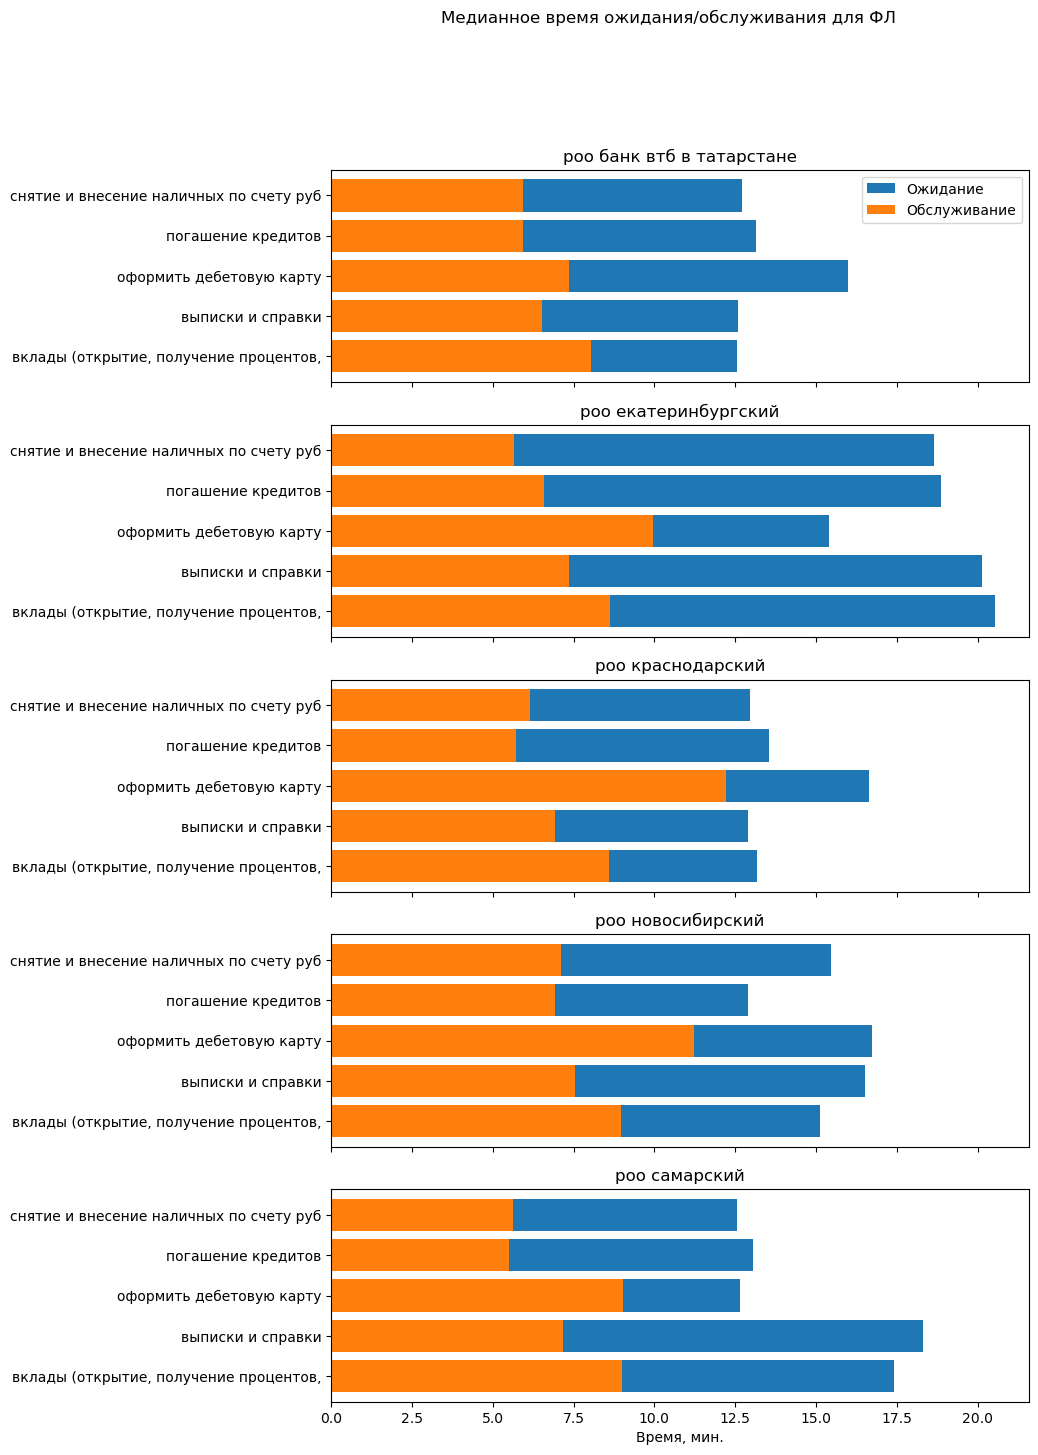

In [41]:
barh_top5_terr(data_ind_pivot, 'ФЛ')

Как можно заметить, время ожидания для основных операция ФЛ в данных отделениях банка состовляет больше 15 минут, время обслуживания меньше 15.

Хуже всех РОО Екатеринбургский, у которого время ожид/обс больше 17.5 минут почти для всех видов операций

Сравним время ожидания и обслуживания для терр. групп с наибольшим количеством операций с остальными

In [42]:
def barh_top5(data, title):
    ls = list(data
              .pivot_table(index='ter_group2', values='operation_count', aggfunc='sum')
              .sort_values(by='operation_count', ascending=False)
              .head(20).index)
    
    data_pivot = (data
                  .pivot_table(index='ter_group2', values=['avg_waiting_min', 'avg_service_min'], aggfunc='mean')
                  .reset_index()
                  .sort_values(by='avg_waiting_min', ascending=False))
    
    top5 = data_pivot.loc[data_pivot['ter_group2'].isin(ls[:5])]
    
    df2 = pd.DataFrame({'ter_group2': ['Другие'], 
                        'avg_waiting_min' : [data_pivot.loc[5:, 'avg_waiting_min'].mean()],
                       'avg_service_min' : [data_pivot.loc[5:, 'avg_service_min'].mean()]})
    top5 = pd.concat([top5, df2], ignore_index=True)
    
    plt.figure(figsize=(16, 9))
    plt.barh(top5['ter_group2'], top5['avg_waiting_min'], label='Ожидание')
    plt.barh(top5['ter_group2'], top5['avg_service_min'], label='Обслуживание')
    plt.xlabel('Время, мин.', fontsize=15)
    plt.ylabel('Территориальная группа 2',fontsize=15)
    plt.legend()
    plt.title('Среднее время ожидания/обслуживания по всем операциям для '+title, fontsize=15);

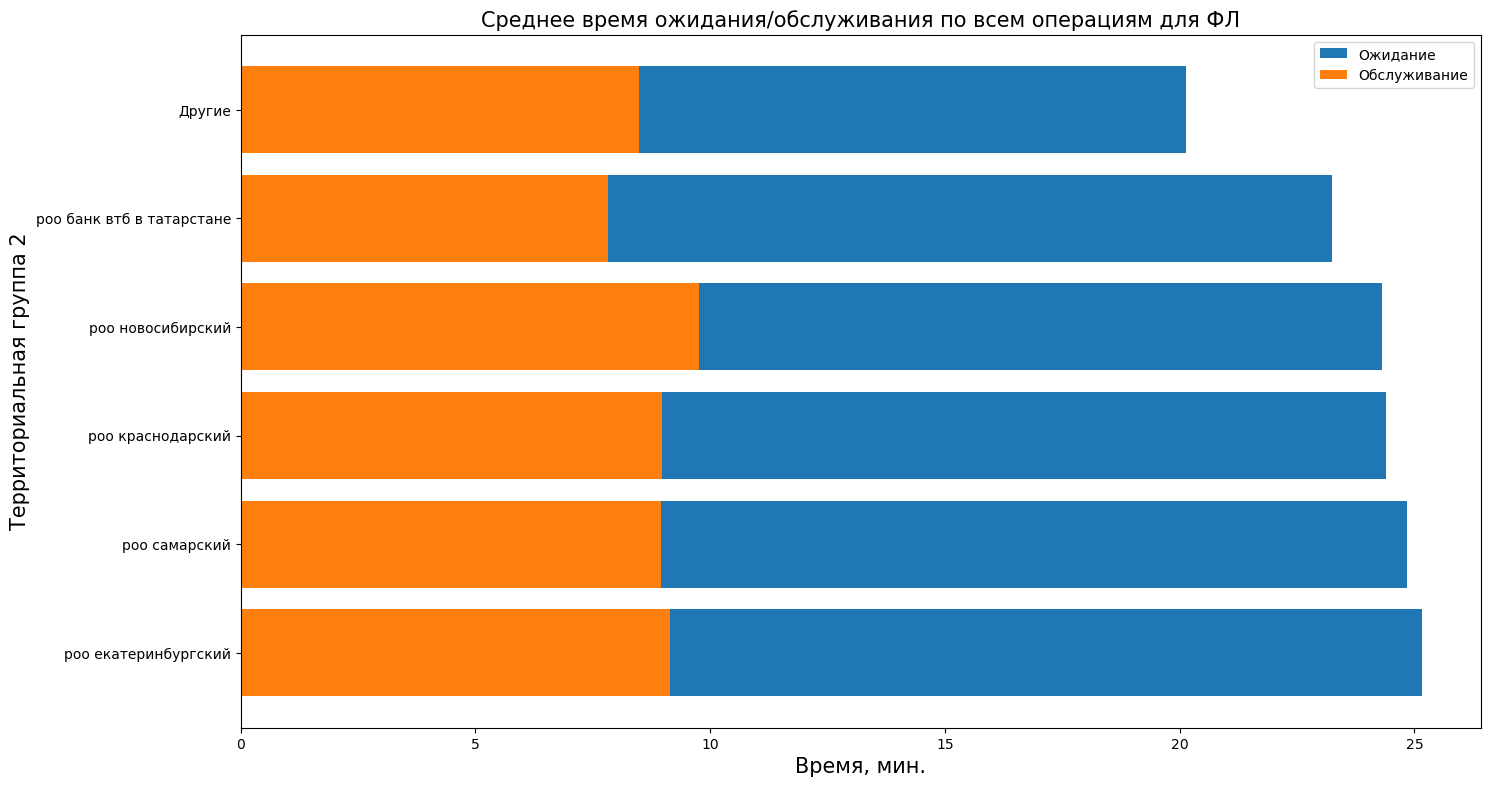

In [43]:
barh_top5(data_ind, 'ФЛ')

Как можно заметить в нижеприведенных территориальных группах время ожид/обс больше практически на 5 минут относительно остальных

- роо краснодарский
- роо банк втб в татарстане
- роо екатеринбургский
- роо новосибирский
- роо самарский

Напишем функцию которая выводит по полученным терр. группам все терр. группы

In [44]:
def top5_ls(df):
    
    ls = list(df
              .pivot_table(index='ter_group2', values='operation_count', aggfunc='sum')
              .sort_values(by='operation_count', ascending=False)
              .head(20).index)
    
    data_pivot = (df
                  .pivot_table(index='ter_group2', values=['avg_waiting_min', 'avg_service_min'], aggfunc='mean')
                  .reset_index()
                  .sort_values(by='avg_waiting_min', ascending=False))
    
    top5 = data_pivot.loc[data_pivot['ter_group2'].isin(ls[:5])]
    
    return ter_group[ter_group['ter_group2'].isin(top5['ter_group2'])]

In [45]:
top5_ls(data_ind).to_excel('ФЛ.xlsx', index=False)

Посмотрим насколько сильно зависят время ожидания от обслуживания, для этого найдем коэф. корреляции и построим диаграмму рассеяния

In [46]:
data_ind['avg_waiting_min'].corr(data_ind['avg_service_min'])

0.0039743565508631425

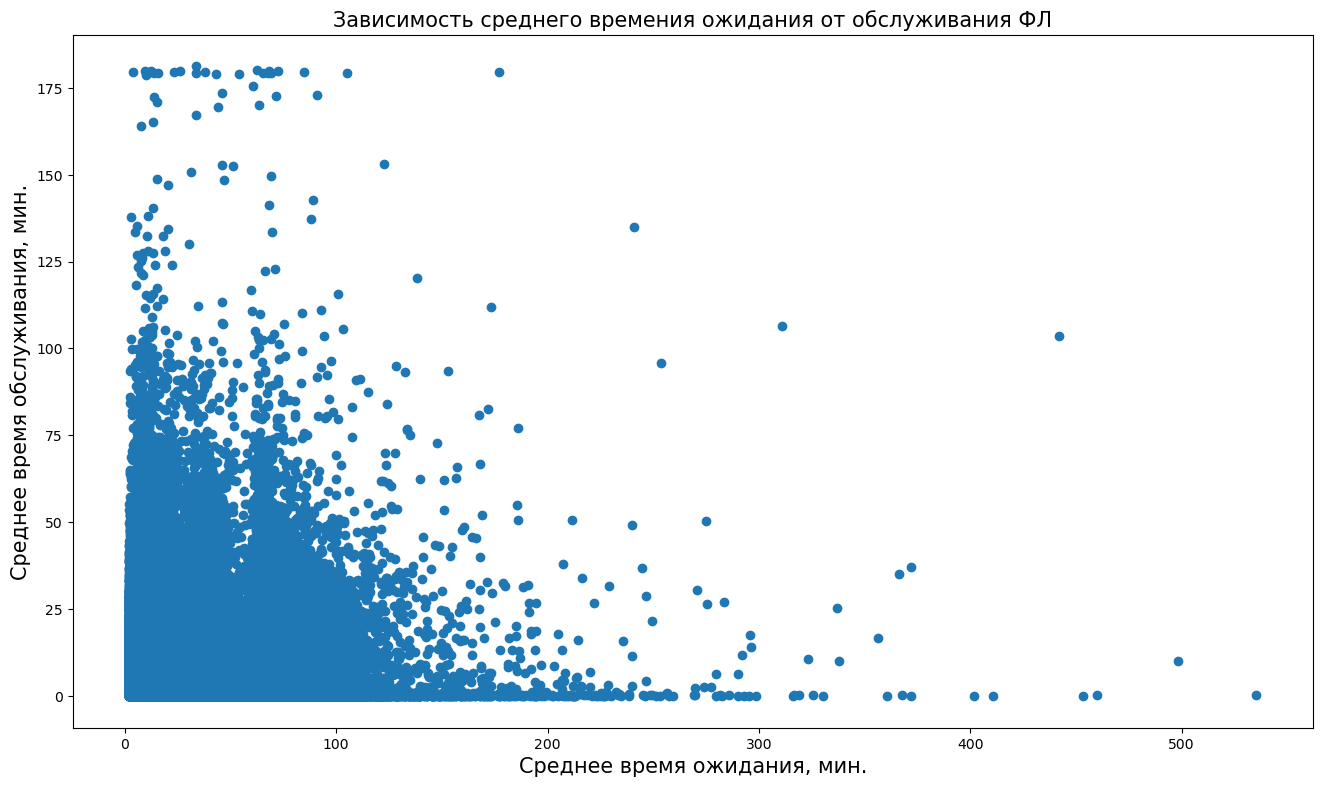

In [47]:
plt.figure(figsize=(16, 9))
plt.scatter(data_ind['avg_waiting_min'], data_ind['avg_service_min'])
plt.xlabel('Среднее время ожидания, мин.', fontsize=15)
plt.ylabel('Среднее время обслуживания, мин.', fontsize=15)
plt.title('Зависимость среднего времения ожидания от обслуживания ФЛ', fontsize=15);

Коэф. корреляций очень низкий, поэтому у них очень слабая

**Промежуточные выводы**

Основные операции для ФЛ:
1. Вклады
2. Выписки и справки
3. Оформление дебетовой карты
4. Снятие и внесение наличных
5. Погашение кредитов

Больше всего операций проводятся:
1. РОО Краснодарский
2. РОО банк ВТБ в Татарстане
3. РОО Екатеринбургский
4. РОО Новосибирский
5. РОО Самарский

Скорее всего из-за малого количества отделений банка в данных городах/регионах

В  территориальных группах время ожидания больше практически на 5 минут относительно остальных. Время обслуживания примерно такое же, как и остальных
1. РОО Краснодарский
2. РОО банк ВТБ в Татарстане
3. РОО Екатеринбургский
4. РОО Новосибирский
5. РОО Самарский

Корреляция между времен ожидания и обслуживания очень слабая

Также была получена таблица со всеми терр. группами у которых время ожидания высокое.

### Физические лица ВИП

In [48]:
data_ind_vip = data.loc[data['client_type'] == 'фл']
data_ind_vip = data_ind_vip.loc[data_ind_vip['vip_client'] == 1]
data_ind_vip = data_ind_vip.loc[data_ind_vip['avg_waiting_min'] > 2]

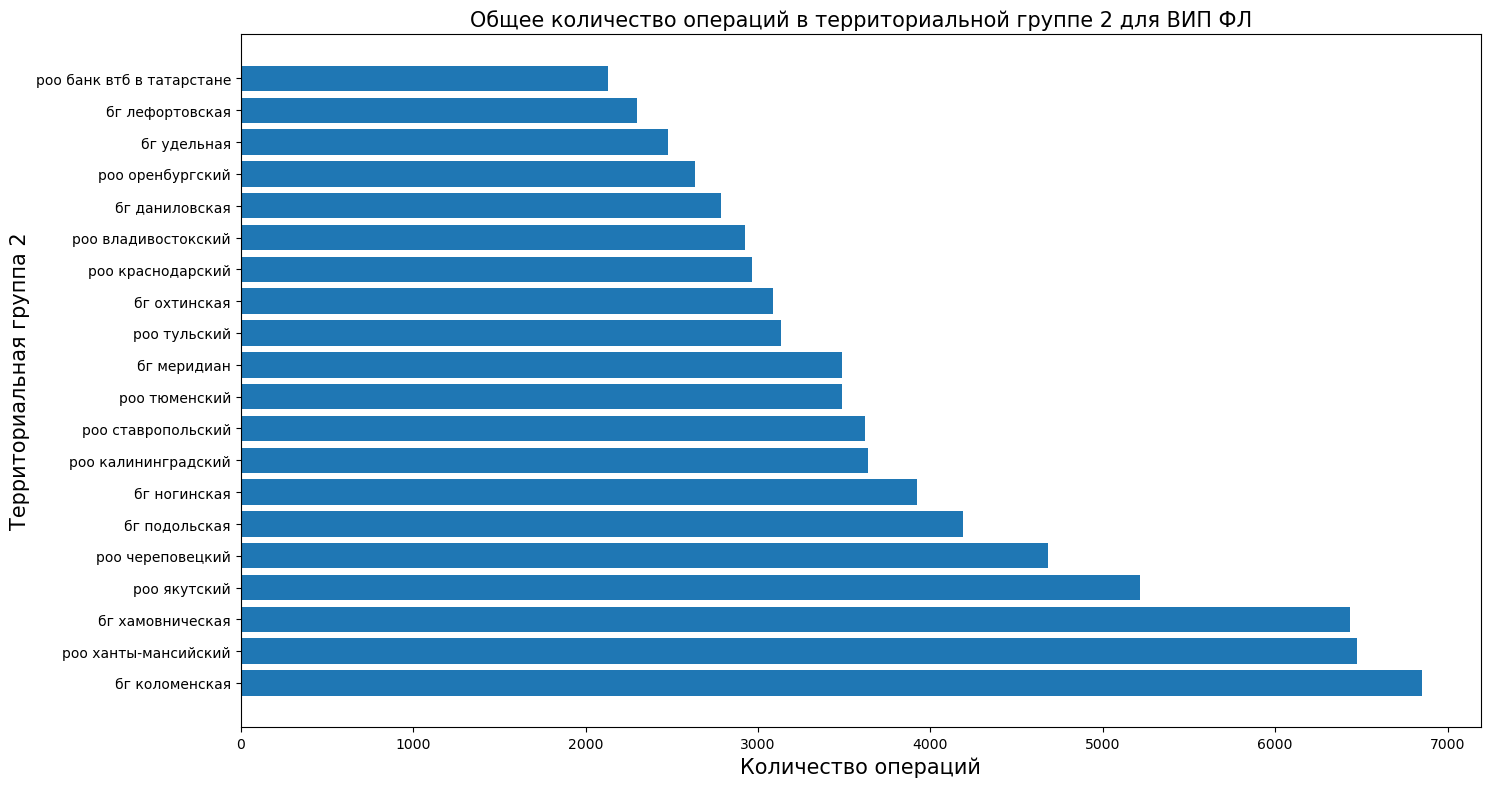

In [49]:
barh_ter(data_ind_vip, 'ВИП ФЛ')

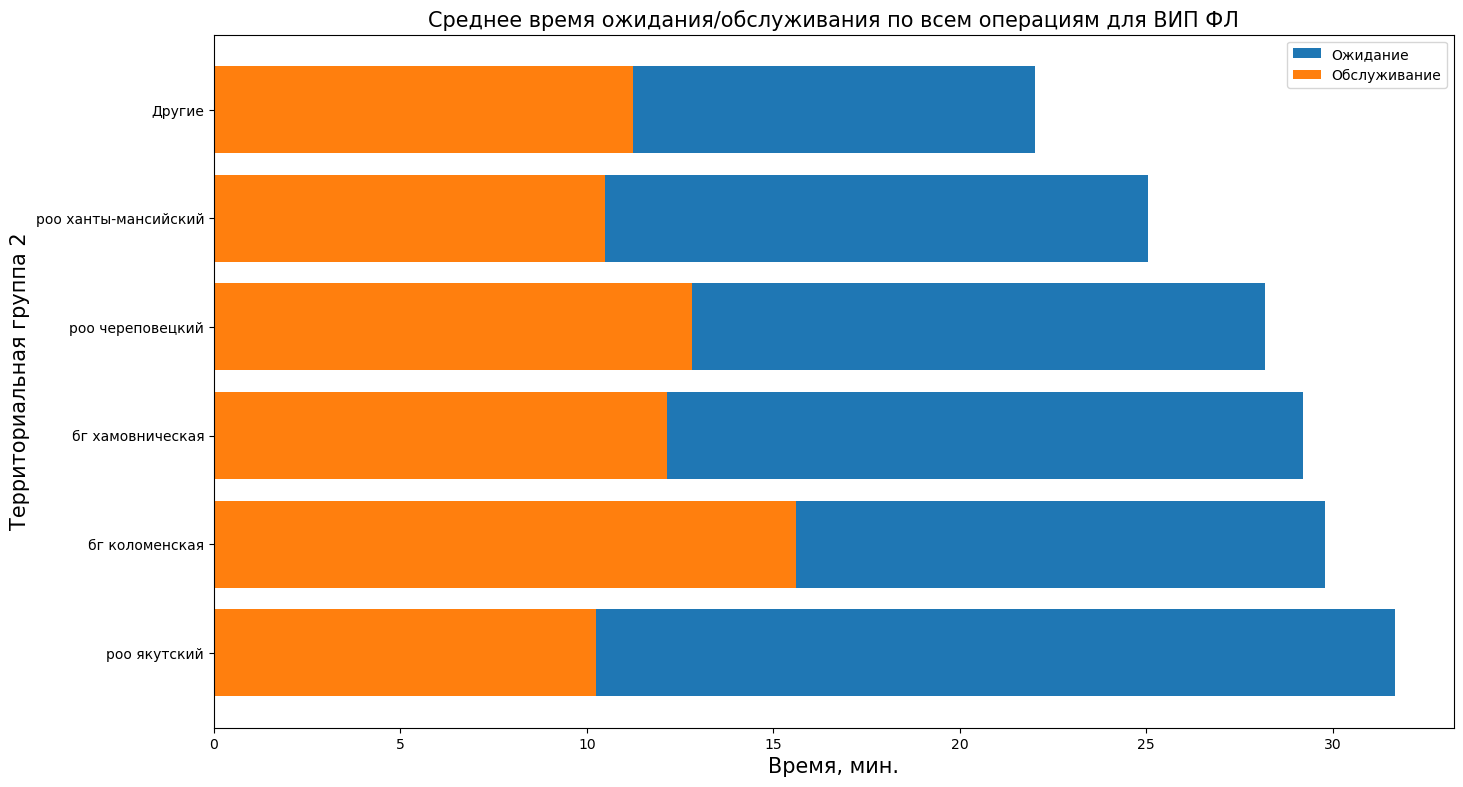

In [50]:
barh_top5(data_ind_vip, 'ВИП ФЛ')

В нижеприведенных территориальных группах время ожидания больше, чем в остальных

1. РОО Якутский
2. БГ Коломенская
3. БГ Хамовническая
4. РОО Череповецкий
5. РОО Ханты-Манскийский

In [51]:
top5_ls(data_ind_vip).to_excel('ВИП ФЛ.xlsx', index=False)

**Промежуточные выводы**

Больше всего операций проводятся:
1. РОО Краснодарский
2. РОО банк ВТБ в Татарстане
3. РОО Екатеринбургский
4. РОО Новосибирский
5. РОО Самарский

В данных терр. группах время ожидания выше, чем у остальных. Время обслуживания примерно такое же, как и остальных

1. РОО Якутский
2. БГ Коломенская
3. БГ Хамовническая
4. РОО Череповецкий
5. РОО Ханты-Манскийский

Также была получена таблица со всеми терр. группами у которых время ожидания высокое.

### Юридические лица

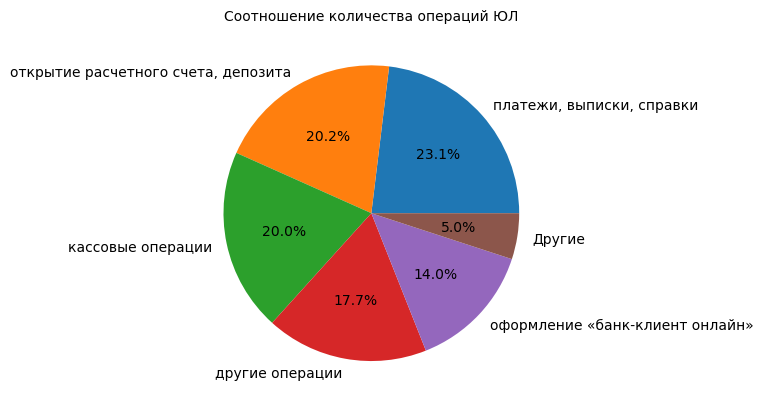

In [52]:
operation_name_pie(data_ent, 'ЮЛ')

Основные операции для ЮЛ:
1. Платежи, выписки, справки
2. Открытие расчетного счета, депозита
3. Кассовые операции
4. Другие операции
5. Оформление "Банк-клиент-онлайн"

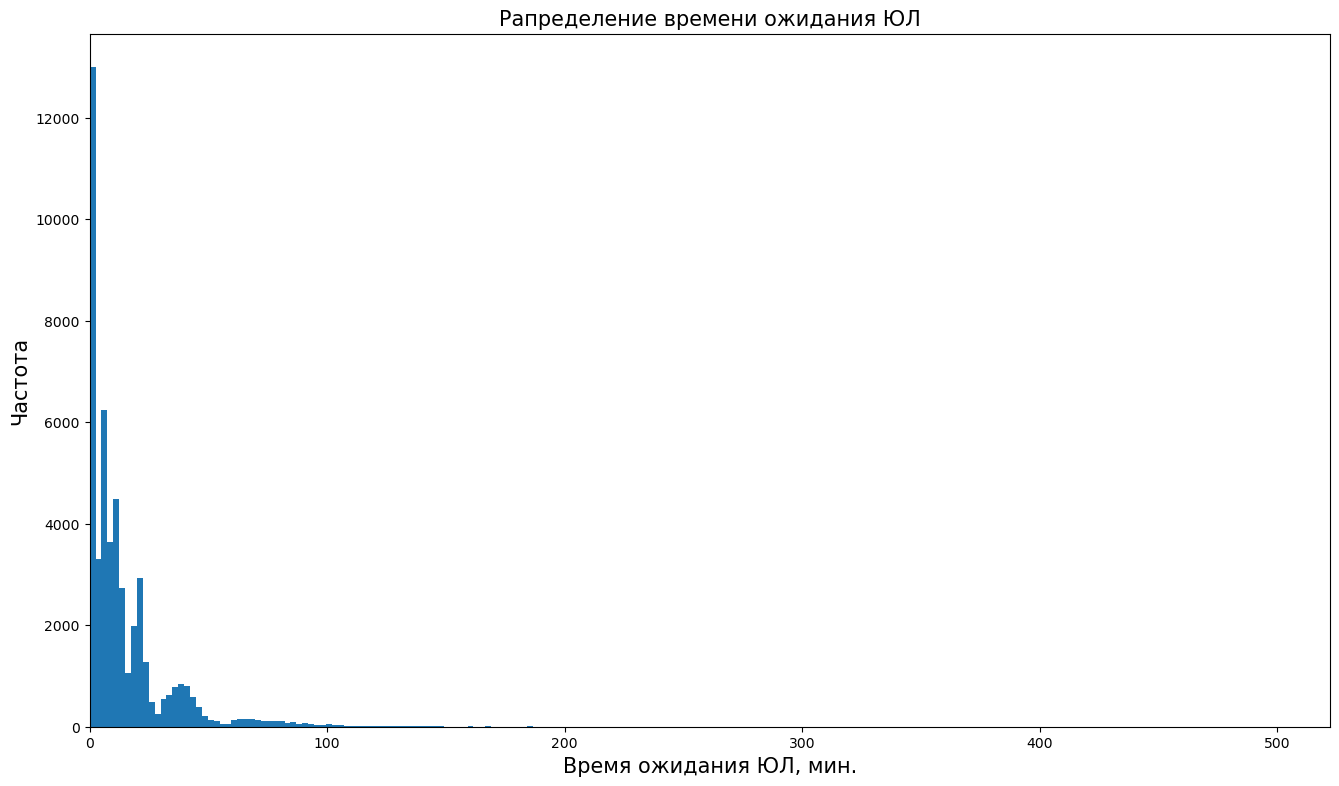

In [53]:
plt.figure(figsize=(16, 9))
plt.hist(data_ent['avg_waiting_min'], bins=200)
plt.xlabel('Время ожидания ЮЛ, мин.', fontsize=15)
plt.xlim(0)
plt.ylabel('Частота', fontsize=15)
plt.title('Рапределение времени ожидания ЮЛ', fontsize=15);

Здесь также присутствуют несколько пиков отвечающие за различные виды операций.

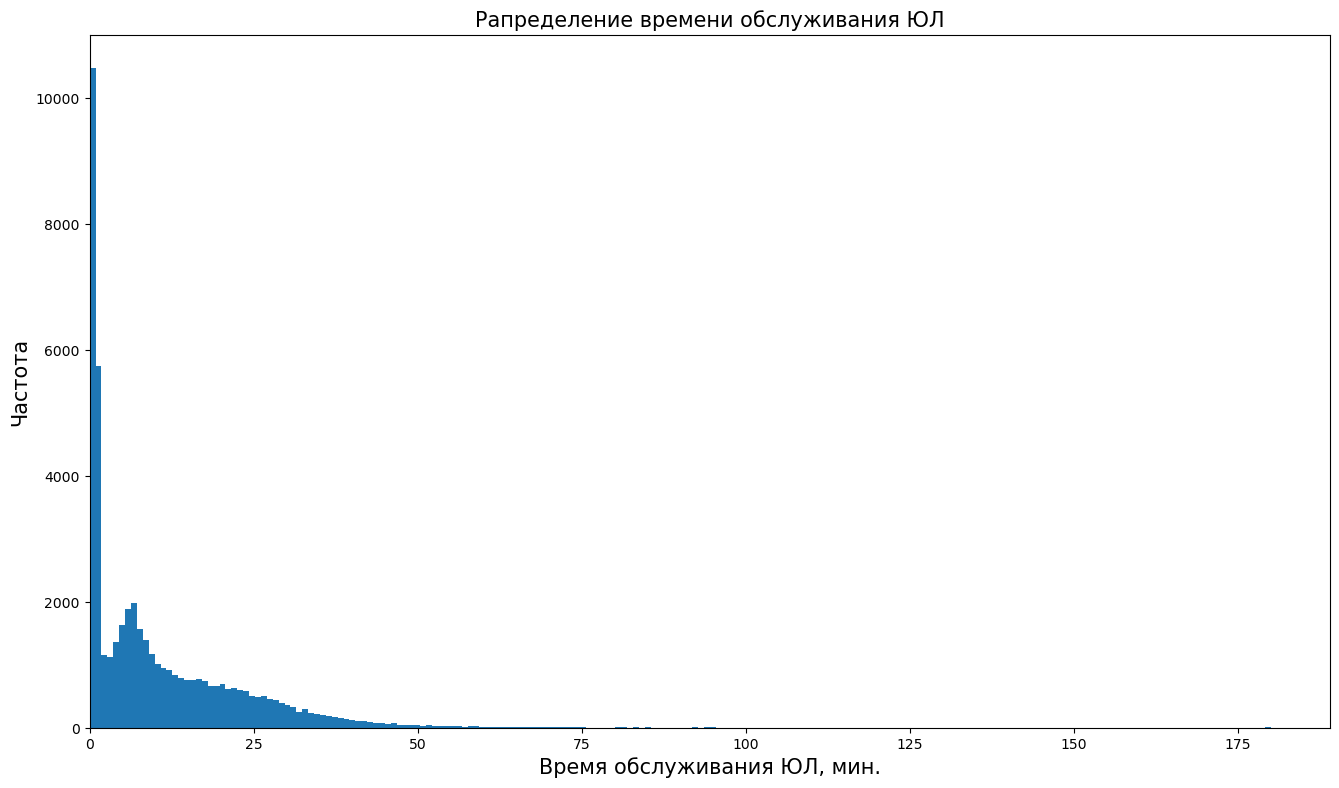

In [54]:
plt.figure(figsize=(16, 9))
plt.hist(data_ent['avg_service_min'], bins=200)
plt.xlabel('Время обслуживания ЮЛ, мин.', fontsize=15)
plt.xlim(0)
plt.ylabel('Частота', fontsize=15)
plt.title('Рапределение времени обслуживания ЮЛ', fontsize=15);

Распределение более гладкое

Но также как и с ФЛ отфильтруем по времени ожидания больше 2 минут.

In [55]:
data_ent = data_ent[data_ent['avg_waiting_min'] > 2]

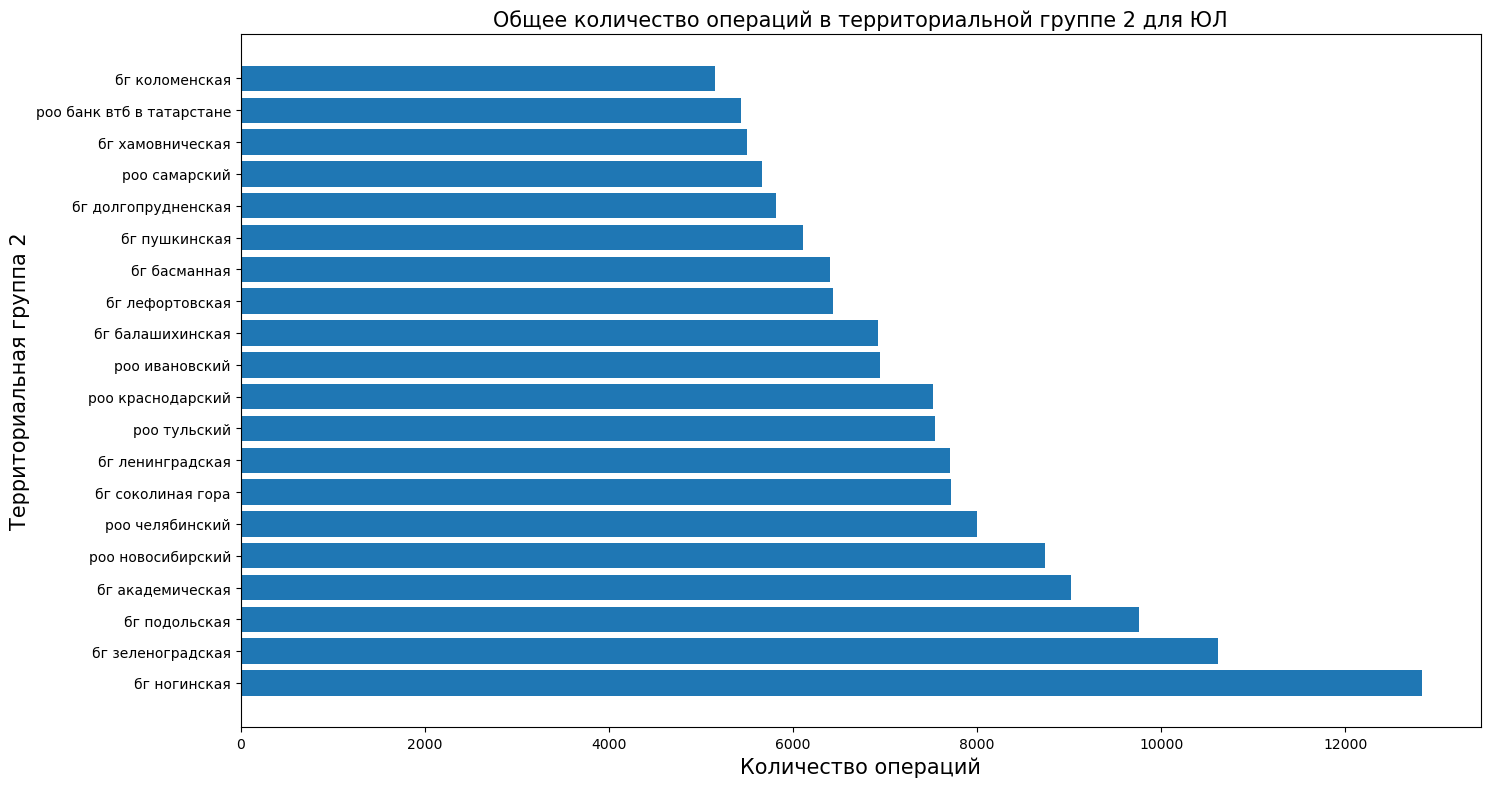

In [56]:
barh_ter(data_ent, 'ЮЛ')

Такая же тендеция как для ФЛ по количеству операций

In [57]:
data_ent_pivot = pivot(data_ent)

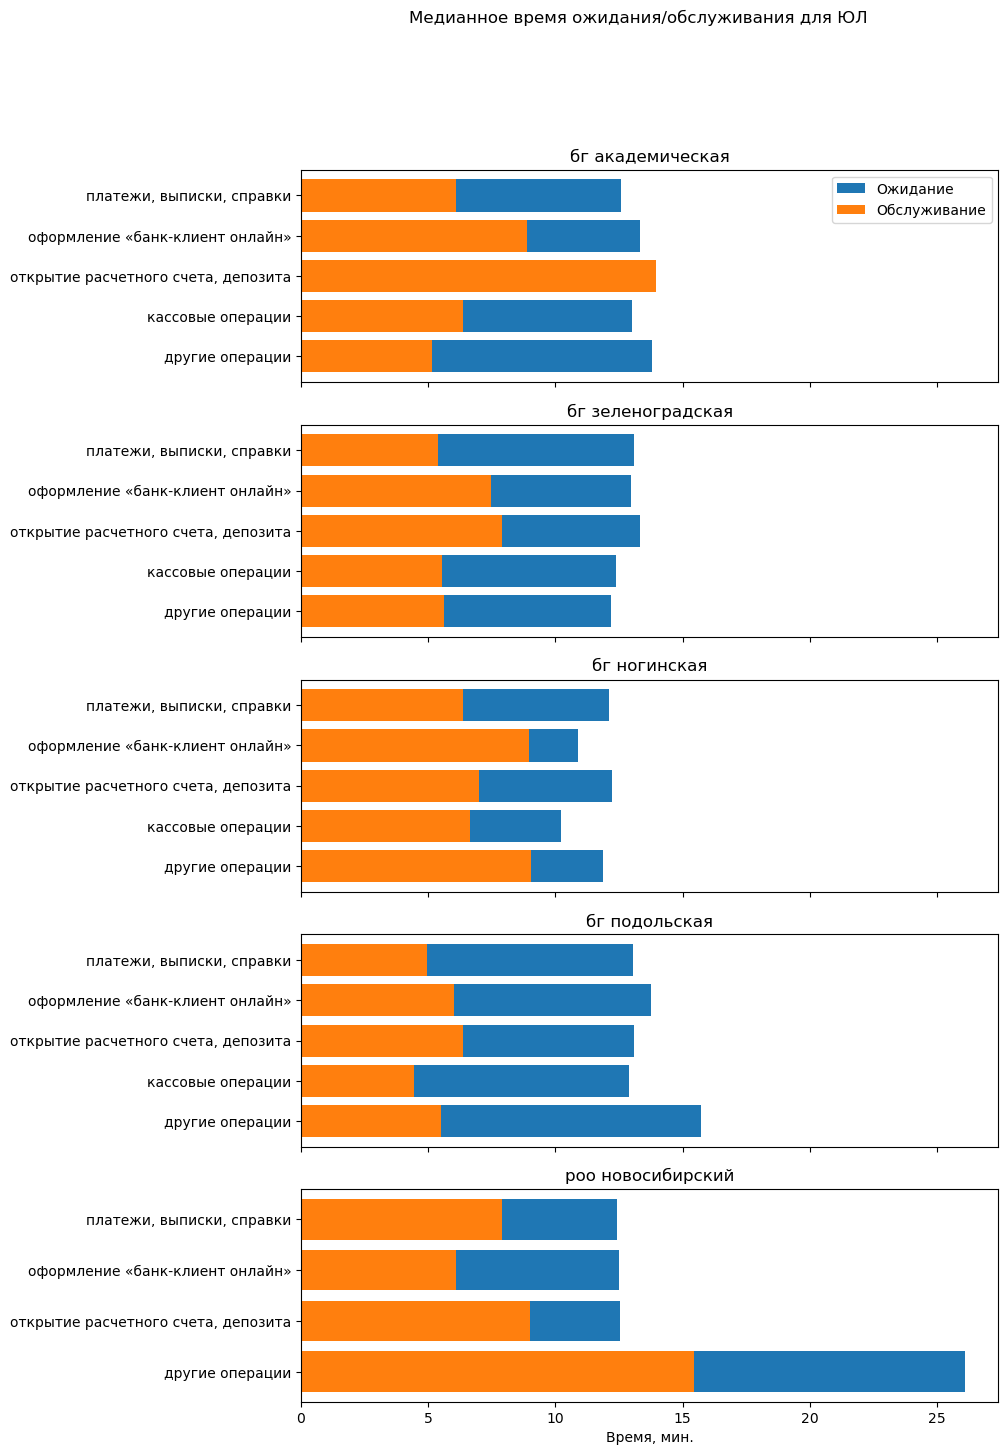

In [58]:
barh_top5_terr(data_ent_pivot, 'ЮЛ')

Самое большое время ожидания:
- бг ногинская
- бг зеленоградская
- бг подольская
- роо новосибирский
- бг академическая

У роо Новосибирский медианное время ожидание для друних операций больше 25 мин., для остальных по 12 мин.

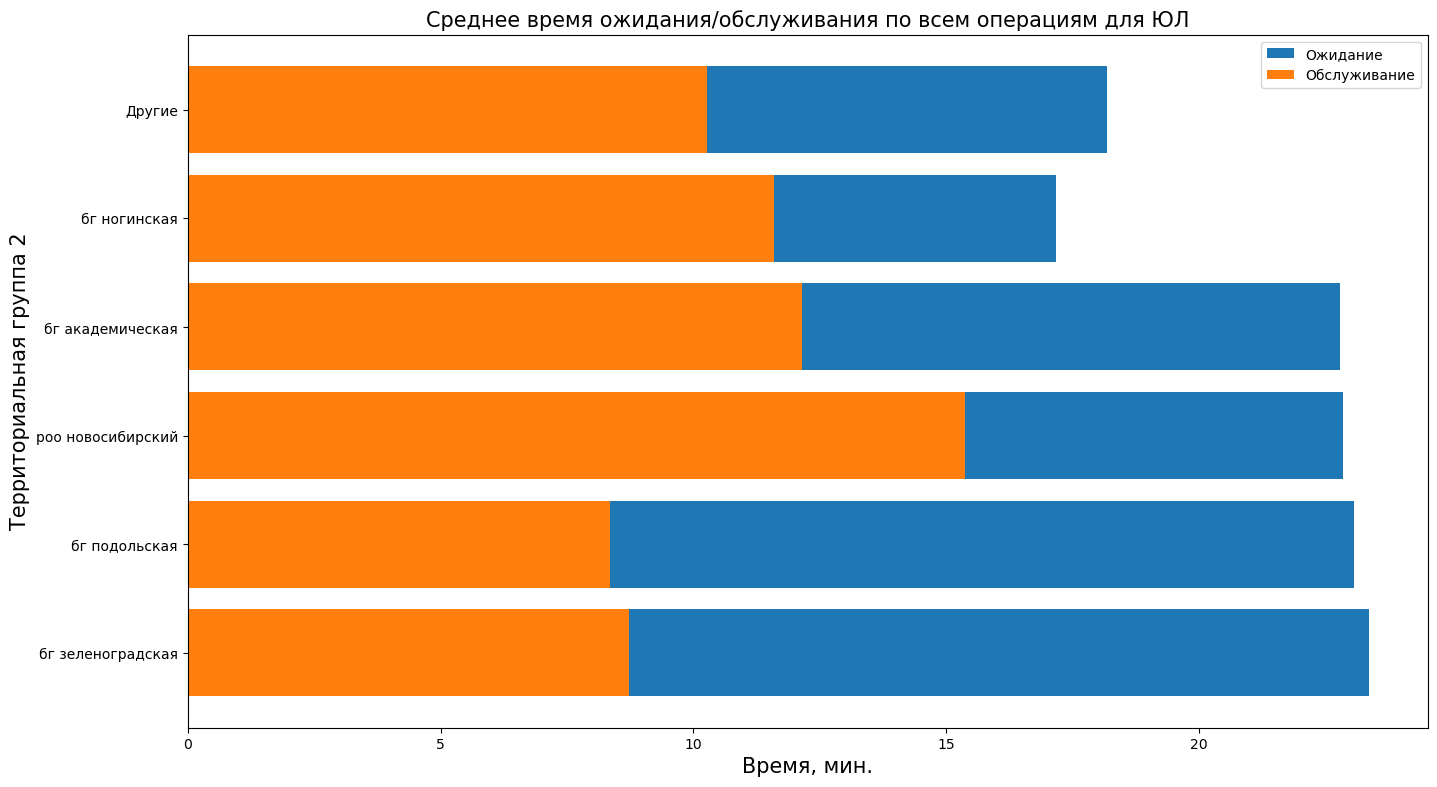

In [59]:
barh_top5(data_ent, 'ЮЛ')

Для тех же терр. групп время ожидания значительно больше, чем у остальных, кроме бг ногинская. РОО Новосибирский обслуживания значительно дольше, чем у остальных

In [60]:
top5_ls(data_ent).to_excel('ЮЛ.xlsx', index=False)

In [61]:
data_ent['avg_waiting_min'].corr(data_ent['avg_service_min'])

-0.022091067601317925

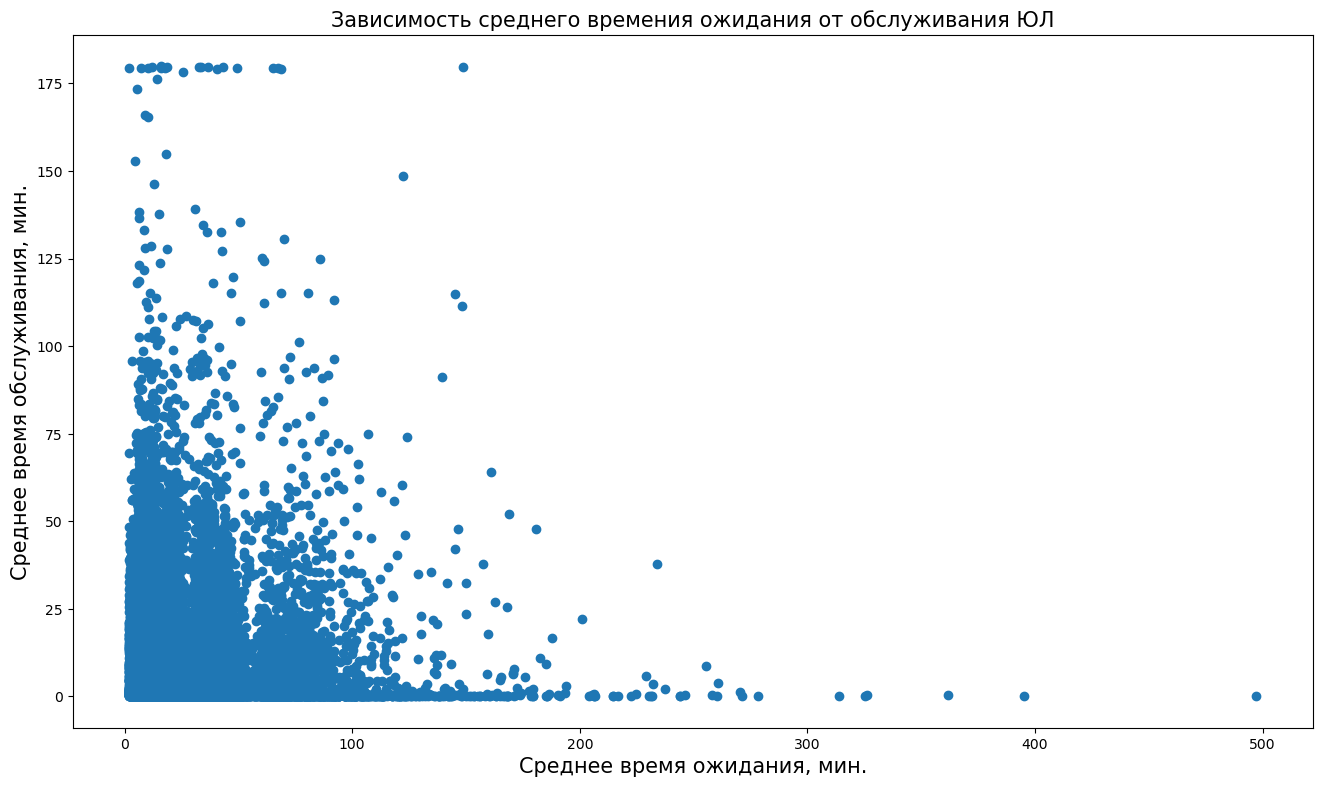

In [62]:
plt.figure(figsize=(16, 9))
plt.scatter(data_ent['avg_waiting_min'], data_ent['avg_service_min'])
plt.xlabel('Среднее время ожидания, мин.', fontsize=15)
plt.ylabel('Среднее время обслуживания, мин.', fontsize=15)
plt.title('Зависимость среднего времения ожидания от обслуживания ЮЛ', fontsize=15);

Корреляций между временами очень слабая

**Промежуточные выводы**

Основные операции для ЮЛ:
1. Платежи, выписки, справки
2. Открытие расчетного счета, депозита
3. Кассовые операции
4. Другие операции
5. Оформление "Банк-клиент-онлайн"

Больше всего операций проводятся:
1. РОО Краснодарский
2. РОО банк ВТБ в Татарстане
3. РОО Екатеринбургский
4. РОО Новосибирский
5. РОО Самарский

Самое большое время ожидания:
1. БГ Ногинская
2. БГ Зеленоградская
3. БГ Подольская
4. РОО Новосибирский
5. БГ Академическая

У РОО Новосибирский медианное время ожидание для других операций больше 25 мин., для остальных по 12 мин, также обслуживание значительно дольше, чем у остальных.

Для тех же терр. групп время ожидания значительно больше, чем у остальных, кроме БГ Ногинская

Также была получена таблица со всеми терр. группами у которых время ожидания высокое.

### Юридические лица ВИП

In [63]:
data_ent_vip = data.loc[data['client_type'] == 'юл']
data_ent_vip = data_ent_vip.loc[data_ent_vip['vip_client'] == 1]
data_ent_vip = data_ent_vip.loc[data_ent_vip['avg_waiting_min'] > 2]

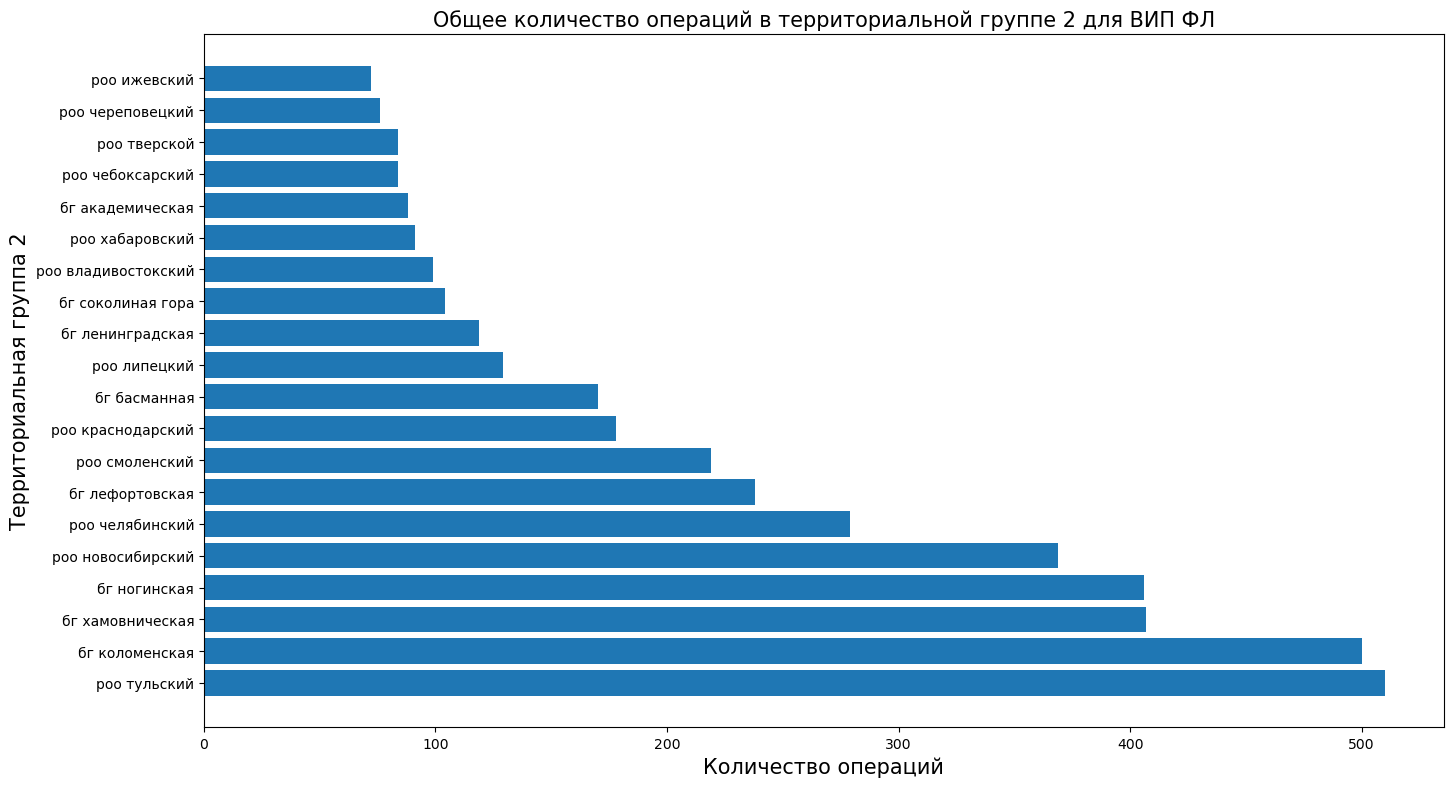

In [64]:
barh_ter(data_ent_vip, 'ВИП ФЛ')

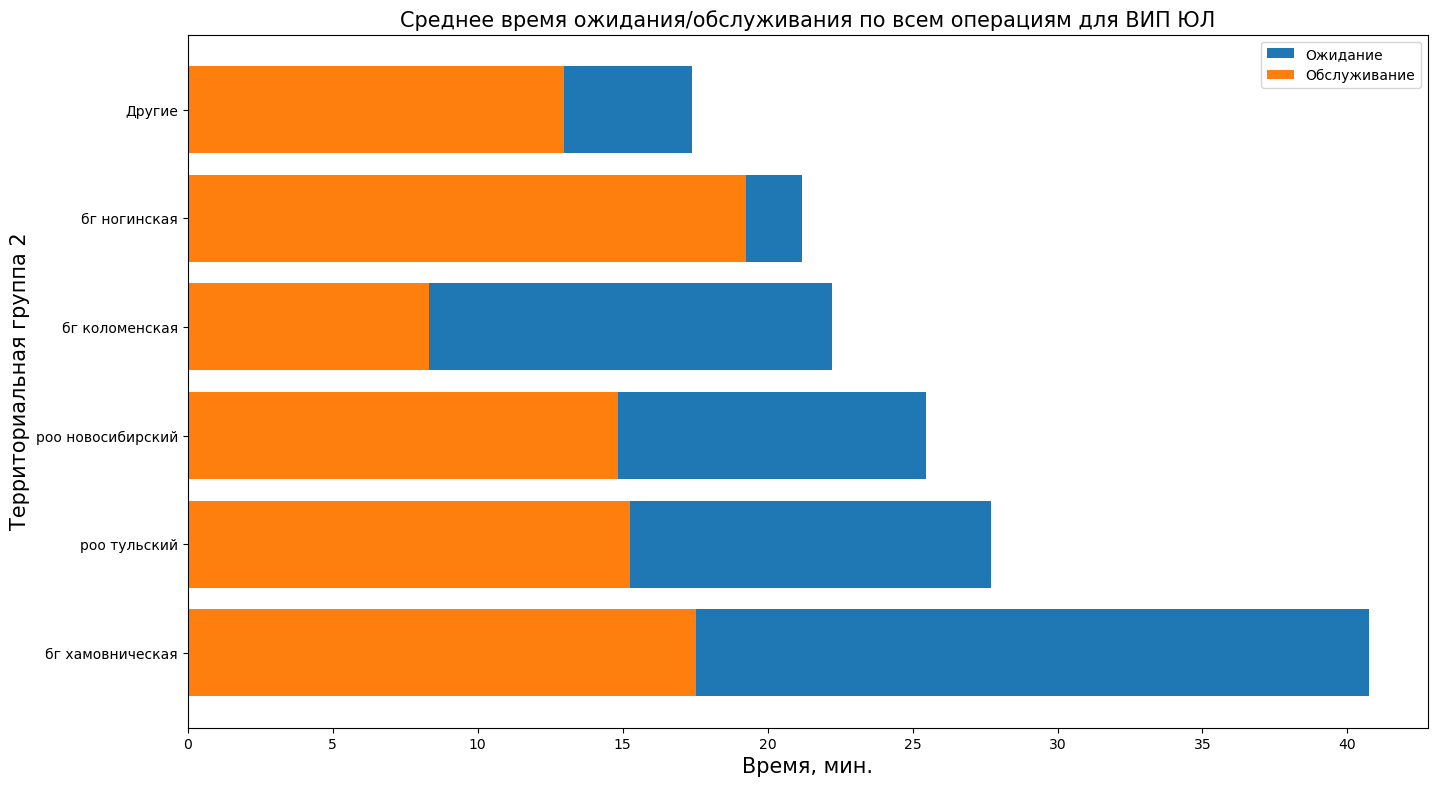

In [65]:
barh_top5(data_ent_vip, 'ВИП ЮЛ')

In [66]:
top5_ls(data_ent_vip).to_excel('ВИП ЮЛ.xlsx', index=False)

**Промежуточные выводы**

Больше всего операций проводятся:
1. РОО Краснодарский
2. РОО банк ВТБ в Татарстане
3. РОО Екатеринбургский
4. РОО Новосибирский
5. РОО Самарский

Самое большое время ожидания:

1. БГ Хамовническая
2. РОО Тульский
3. РОО Новосибирский
4. БГ Коломенская
5. БГ Ногинская

У БГ Ногинская самое большое время обслуживания, у БГ Коломенская ниже, чем у остальных

Также была получена таблица со всеми терр. группами у которых время ожидания высокое.

## Заключение

**Загрузка данных и предобработка :**


- Были изучены исходные данные
- Все строковые данные были переведены в нижний регистр
- Обработаны дубликаты
- Поскольку данные только за 2009 год, был удален столбец с годом
- Были обработаны столбцы с временем ожидания и обслуживания
- Добавлен столбец с временем обслуживания и ожидания в минутах, для дальнейшей визуализации
- Удалены ненужные столбцы

**Анализ данных:**

Больше всего операций для всех клиентов проводятся:
1. РОО Краснодарский
2. РОО банк ВТБ в Татарстане
3. РОО Екатеринбургский
4. РОО Новосибирский
5. РОО Самарский

Скорее всего из-за малого количества отделений банка в данных городах/регионах

- Физические лица

    Основные операции для ФЛ:
    1. Вклады
    2. Выписки и справки
    3. Оформление дебетовой карты
    4. Снятие и внесение наличных
    5. Погашение кредитов

    В  территориальных группах время ожидания больше практически на 5 минут относительно остальных, но время обслуживания примерно такое же
    1. РОО Краснодарский
    2. РОО банк ВТБ в Татарстане
    3. РОО Екатеринбургский
    4. РОО Новосибирский
    5. РОО Самарский

    Корреляция между времен ожидания и обслуживания очень слабая
    
    
- ВИП Физические лица

    В данных терр. группах время ожидания выше, чем у остальных, время обслуживания примерно такое же

    1. РОО Якутский
    2. БГ Коломенская
    3. БГ Хамовническая
    4. РОО Череповецкий
    5. РОО Ханты-Манскийский
    

- Юридические лица

    Основные операции для ЮЛ:
    
    1. Платежи, выписки, справки
    2. Открытие расчетного счета, депозита
    3. Кассовые операции
    4. Другие операции
    5. Оформление "Банк-клиент-онлайн"

    Самое большое время ожидания:
    
    1. БГ Ногинская
    2. БГ Зеленоградская
    3. БГ Подольская
    4. РОО Новосибирский
    5. БГ Академическая

    У РОО Новосибирский медианное время ожидание для других операций больше 25 мин., для остальных по 12 мин, также обслуживание значительно дольше, чем у остальных.

    Для тех же терр. групп время ожидания значительно больше, чем у остальных, кроме БГ Ногинская
    
- ВИП Юридические лица

    Самое большое время ожидания:
    
    1. БГ Хамовническая
    2. РОО Тульский
    3. РОО Новосибирский
    4. БГ Коломенская
    5. БГ Ногинская

    У БГ Ногинская самое большое время обслуживания, у БГ Коломенская ниже, чем у остальных

Также была получена таблица со всеми терр. группами у которых время ожидания высокое.

**Выводы:**

Стоит рассмотреть рабочий процесс в приведенных территориальных группах и опитимизировать его, либо открыть больше банковсих отделений в данных регионах